# Capstone Project - Car accident severity (Week 1)

**Introduction**

Incidences can be caused by many factors such as environmental conditions which are controllable and uncontrollable. 
The levels of severity are also varied among accidents. The example data of an incident in Seattle shows the the collision can be some prpertry dammage to injury.  
In order to prevent and manage those incidences, the good understanding in causes and influence of those parameters is required.
The tools and the knowledge of data secience can be used to identify, classify and predict such of accident for furture reduction and prevention.

***

**DATA**

The example dataset is a collision records of Seattle which contains informtaion from 2006 untill 2020 with 194,673 records of accidents.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [45]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

In [125]:
#df.dtypes

In [127]:
#df1 = df['SEVERITYCODE.1'].value_counts().to_frame()
#df_p = round((df1/194673)*100,2)

In [128]:
#sf1 = pd.DataFrame(data=df_p.values, index = df_p.index, columns=['Case Number'])

In [64]:
sf1

,Case Number
1,70.11
2,29.89


In [129]:
#df['COLLISIONTYPE'].value_counts()

In [56]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])

The severity levelS of accident are defined by the code 1 indicates the accident with only property damage and code 2 involves injury. 

The number of records for code 1 are 136,485 cases (roughly 70%) and for code 2 are 58,188 cases (30%).

*Figure1 : Bar chart shows Number of cases for Severity Code 1 and 2*

Text(0.5, 1.0, 'Case number of different Severity Code')

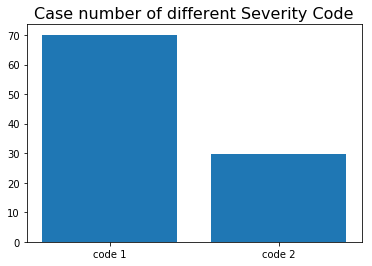

In [68]:
X = ['code 1', 'code 2']
y = sf1['Case Number']
plt.bar(X,y)
plt.figsize=(20, 8)
plt.title('Case number of different Severity Code',fontsize = 16) # add title to the


The highest number of accidents considered collision type is Parked Car for severity code 1 of 14671 cases and Rear Ended for severity code 2 for 45325 cases. 

*Table i: Table shows Number of cases for Severity Code 1 and 2 depending on the types of collision*

In [115]:
n = df.groupby('SEVERITYDESC')['COLLISIONTYPE'].value_counts().to_frame()
pd.DataFrame(data=n.values, index = n.index, columns=['Cases'])

Cases
SEVERITYDESC                   COLLISIONTYPE       
Injury Collision               Rear Ended     14671
                               Angles         13624
                               Other           6112
                               Pedestrian      5936
                               Left Turn       5411
                               Cycles          4744
                               Parked Car      2662
                               Sideswipe       2506
                               Head On          872
                               Right Turn       609
Property Damage Only Collision Parked Car     45325
                               Angles         21050
                               Rear Ended     19419
                               Other          17591
                               Sideswipe      16103
                               Left Turn       8292
                               Right Turn      2347
                               Head On         1152
                               Pedestrian       672
                               Cycles           671

Considering weather, most of accidents occur on the clear weather environment for both severity code. 

*Table ii: Table shows Number of cases for Severity Code 1 and 2 depending on weather*

In [118]:
m = df.groupby('SEVERITYDESC')['WEATHER'].value_counts().to_frame()
pd.DataFrame(data=m.values, index = m.index, columns=['Cases'])

Cases
SEVERITYDESC                   WEATHER                        
Injury Collision               Clear                     35840
                               Raining                   11176
                               Overcast                   8745
                               Unknown                     816
                               Fog/Smog/Smoke              187
                               Snowing                     171
                               Other                       116
                               Sleet/Hail/Freezing Rain     28
                               Blowing Sand/Dirt            15
                               Severe Crosswind              7
                               Partly Cloudy                 3
Property Damage Only Collision Clear                     75295
                               Raining                   21969
                               Overcast                  18969
                               Unknown                   14275
                               Snowing                     736
                               Other                       716
                               Fog/Smog/Smoke              382
                               Sleet/Hail/Freezing Rain     85
                               Blowing Sand/Dirt            41
                               Severe Crosswind             18
                               Partly Cloudy                 2

Considering codition of the road, most of accidents occur on dry condition for both severity code. 

*Table iii: Table shows Number of cases for Severity Code 1 and 2 depending on road condition*

In [120]:
o = df.groupby('SEVERITYDESC')['ROADCOND'].value_counts().to_frame()
pd.DataFrame(data=o.values, index = o.index, columns=['Cases'])

Cases
SEVERITYDESC                   ROADCOND             
Injury Collision               Dry             40064
                               Wet             15755
                               Unknown           749
                               Ice               273
                               Snow/Slush        167
                               Other              43
                               Standing Water     30
                               Oil                24
                               Sand/Mud/Dirt      23
Property Damage Only Collision Dry             84446
                               Wet             31719
                               Unknown         14329
                               Ice               936
                               Snow/Slush        837
                               Other              89
                               Standing Water     85
                               Sand/Mud/Dirt      52
                               Oil                40

There are 9,333 accidents involved speeding which around 3,500 cases are injury collision.

*Table iv: Table shows Number of cases for Severity Code 1 and 2 depending on speeding*

In [130]:
#df['SPEEDING'].value_counts()

In [121]:
sp = df.groupby('SEVERITYDESC')['SPEEDING'].value_counts().to_frame()
pd.DataFrame(data=sp.values, index = sp.index, columns=['Cases'])

,,Cases
SEVERITYDESC,SPEEDING,
Injury Collision,Y,3531
Property Damage Only Collision,Y,5802


The target predicted variable of the project will be 'SEVERITY CODE' because it is used indicate the severity of an accident. 

The Attributes that will be used to weigh the severity of an accident are 'Collision types' 'Weather','Road condition' and 'Speeding'.

The current data contains many information that won't be used in the analysis. It is imporatant to primarily pre-process the data as following

- Extract Severitycode, collision types, weather, road condition and speeding out from the dataset

- Convert Categorical features to numerical values

- Select featuers of interest from each attributes 

- Append all data into the feature Data Frame

